In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

from plotly.subplots import make_subplots
from scipy.stats import skew, kurtosis

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/TV_Market_Analysis/data/raw/tv_cleaned_data.csv')

In [4]:
df.head()

,Brand,Model,Inches,Price,Price_Category,DisplayType,PPI,outlier_flag
0,Oneplus,y1s 4,40,18990,Affordable,Full HD,55.07,0
1,Tcl,32s5403af 3,32,13990,Affordable,Full HD,68.84,0
2,Tcl,32s5400a 3,32,9990,Budget,HD-Ready,48.97,0
3,Sony,bravia kd-65x74l 6,65,74990,High-end,4K,67.78,0
4,Sony,bravia kd-43x74k 4,43,39990,Mid-range,4K,102.46,0


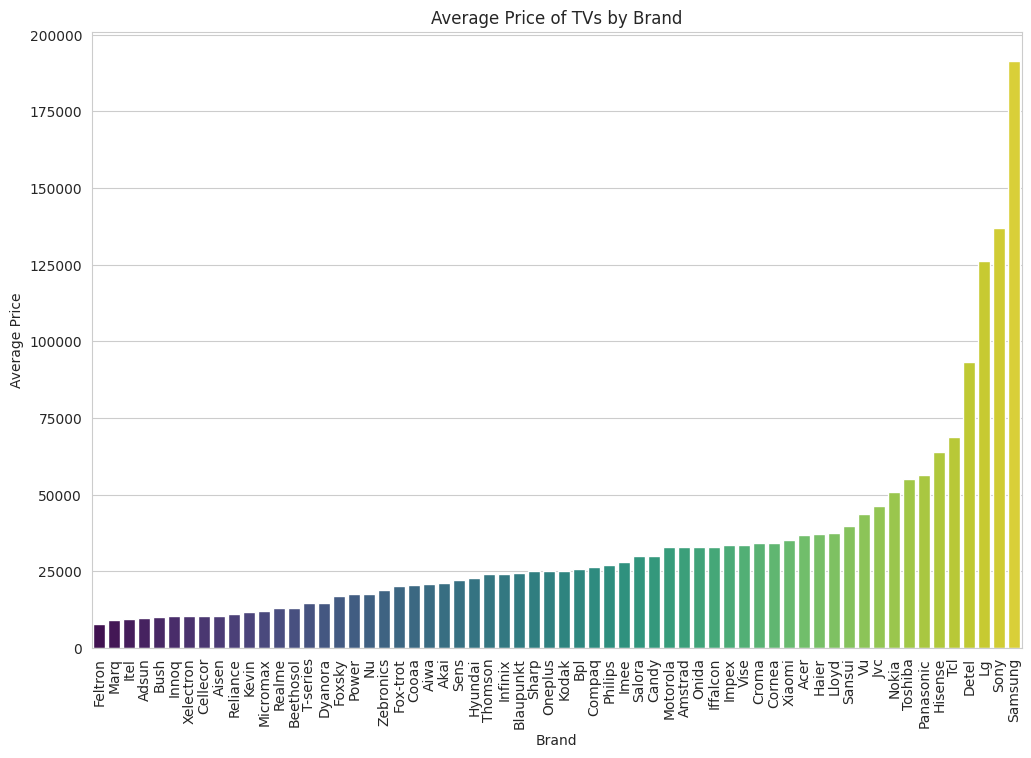

In [6]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Group the data by Brand and calculate the average price
brand_avg_price = df.groupby('Brand')['Price'].mean().sort_values()

# Plotting the average price by brand
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")
plt.title('Average Price of TVs by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


In [8]:
import plotly.express as px

# Calculate the top 5 brands by value counts
top_brands = df['Brand'].value_counts().head(5).index

# Filter the dataset to include only the top 5 brands
top_brands_data = df[df['Brand'].isin(top_brands)]

# Group by Brand and calculate the average price
top_brands_avg_price = top_brands_data.groupby('Brand')['Price'].mean().round(2).sort_values().reset_index()

# Plotting the average price by top 5 brands
fig = px.bar(top_brands_avg_price, x='Brand', y='Price',
             title='Average Price of TVs by Top 5 Brands',
             labels={'Price': 'Average Price', 'Brand': 'Brand'},
             color='Price',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [20]:
# Identify the outlier models
outliers = df[df['outlier_flag'] == 1]

# Display the outlier models and their details
outliers_details = outliers[['Brand', 'Model', 'Inches', 'Price', 'Price_Category', 'DisplayType', 'PPI']]

outliers_details.head()

,Brand,Model,Inches,Price,Price_Category,DisplayType,PPI
93,Samsung,qa55qn90bak 5,55,184990,Premium,QLED 4K,80.11
99,Sony,bravia xr-55a80l 5,55,180490,Premium,4K,80.11
100,Sony,bravia xr-77a80l 7,77,446490,Luxury,4K,57.22
102,Samsung,qa65qn800ck 6,65,364990,Luxury,QLED 8K UHD,135.56
103,Samsung,qa75qn800bk 7,75,799990,Luxury,QLED 8K UHD,117.49


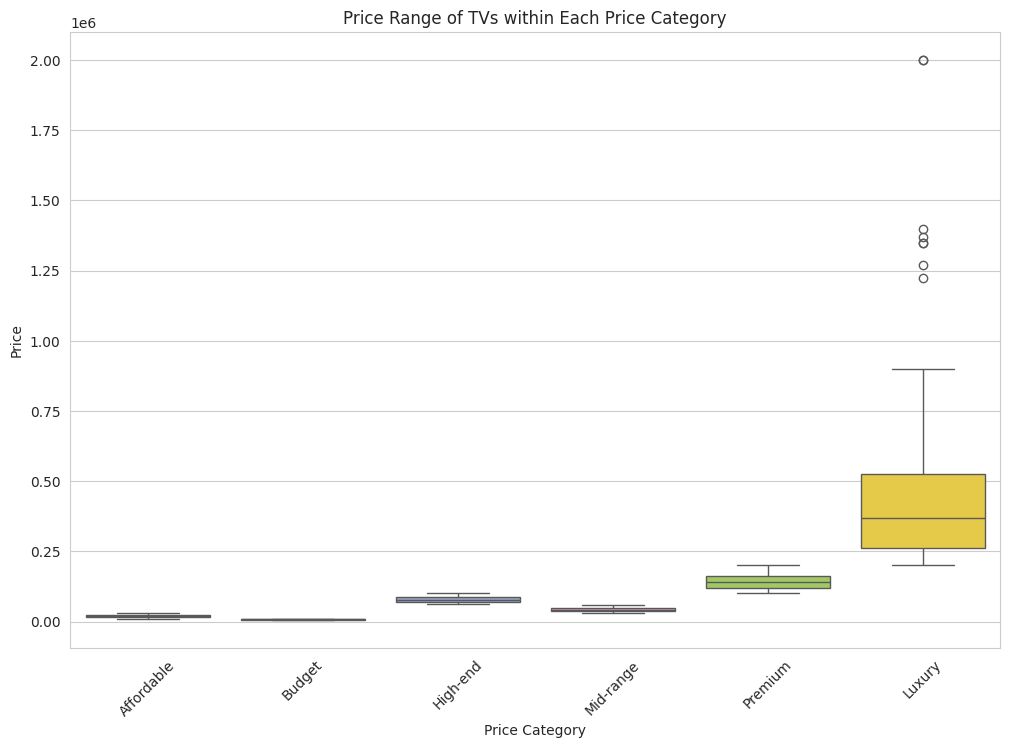

In [23]:
# Visual exploration of price ranges within each price category

# Creating a figure and axis
plt.figure(figsize=(12, 8))

# Boxplot of prices within each price category
sns.boxplot(x='Price_Category', y='Price', data=df, palette='Set2')

# Adding title and labels
plt.title('Price Range of TVs within Each Price Category')
plt.xlabel('Price Category')
plt.ylabel('Price')

# Display the plot
plt.xticks(rotation=45)
plt.show()


In [24]:
# Calculate the top 5 brands by value counts
top_brands = df['Brand'].value_counts().head(5).index

# Filter the dataset to include only the top 5 brands
top_brands_data = df[df['Brand'].isin(top_brands)]

# Calculate the range of screen sizes and prices for each brand
range_stats = top_brands_data.groupby('Brand').agg({
    'Inches': lambda x: x.max() - x.min(),
    'Price': lambda x: x.max() - x.min()
}).reset_index()

range_stats = range_stats.sort_values(by=['Inches', 'Price'], ascending=[False, False])


range_stats


,Brand,Inches,Price
0,Lg,73,1986491
2,Samsung,66,1985367
3,Sony,53,874991
4,Tcl,53,420000
1,Panasonic,43,175840


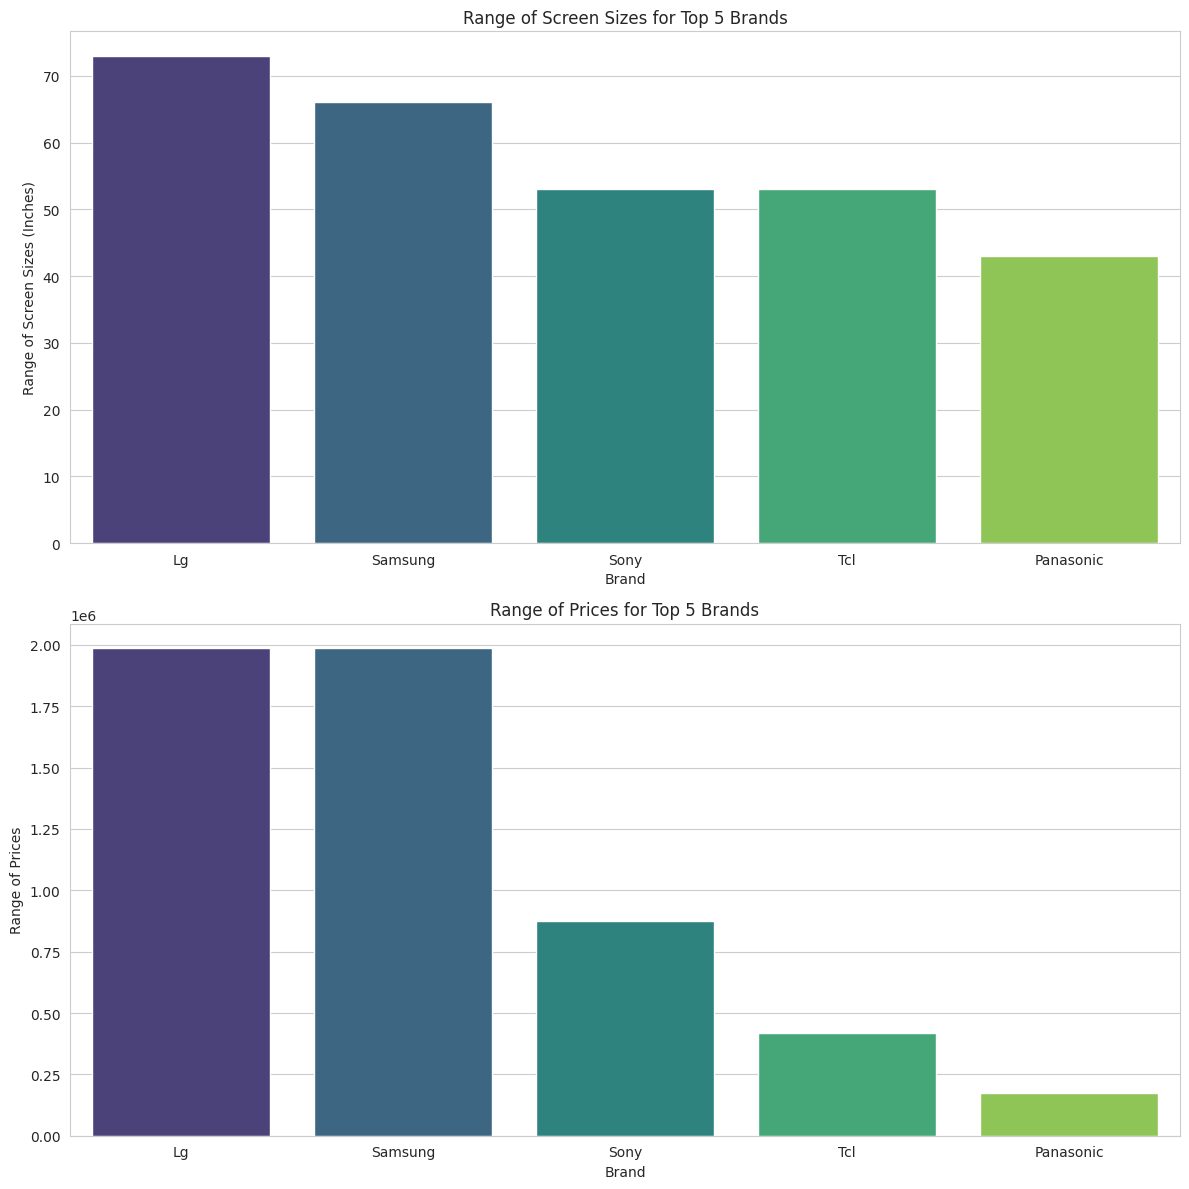

In [25]:
# Visualizing the range of screen size and price for the top 5 brands

# Creating a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Bar plot for the range of screen sizes
sns.barplot(x='Brand', y='Inches', data=range_stats, palette='viridis', ax=ax[0])
ax[0].set_title('Range of Screen Sizes for Top 5 Brands')
ax[0].set_xlabel('Brand')
ax[0].set_ylabel('Range of Screen Sizes (Inches)')

# Bar plot for the range of prices
sns.barplot(x='Brand', y='Price', data=range_stats, palette='viridis', ax=ax[1])
ax[1].set_title('Range of Prices for Top 5 Brands')
ax[1].set_xlabel('Brand')
ax[1].set_ylabel('Range of Prices')

# Display the plots
plt.tight_layout()
plt.show()


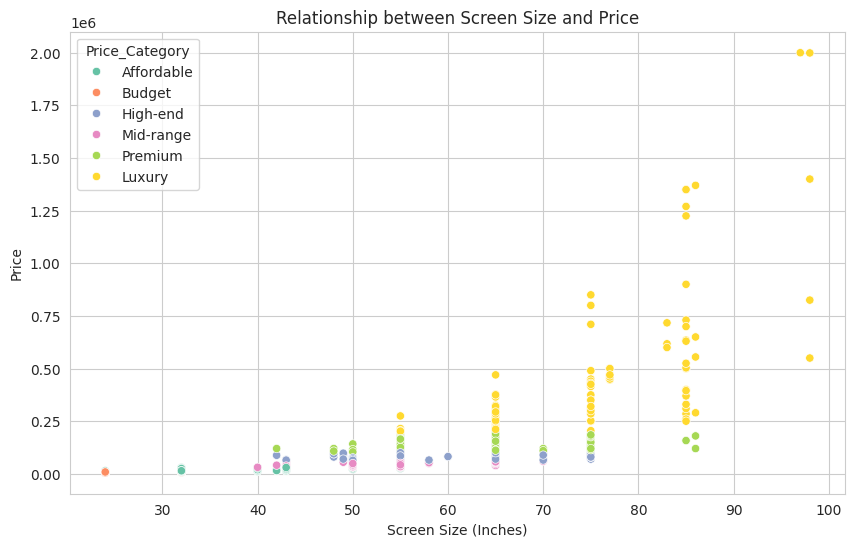

In [26]:
# Visualizing the relationship between screen size and price

plt.figure(figsize=(10, 6))

# Scatter plot of screen size vs. price
sns.scatterplot(x='Inches', y='Price', data=df, hue='Price_Category', palette='Set2')

# Adding title and labels
plt.title('Relationship between Screen Size and Price')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price')

# Display the plot
plt.show()
